In [1]:
import os
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import peakutils
%matplotlib inline 
from math import sqrt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [3]:
x_df = pd.read_csv('avg_no_sat_baseline.csv', sep = ',')
values = x_df.values
#wl=x_df.columns.values
#print(wl.shape)

#print(values)
#print(type(values))
print(values.shape)
print(values[1].shape)
print(len(values))
x_df

(24, 1446)
(1446,)
24


,252.071400,252.201700,252.331900,252.462200,252.592400,252.722600,252.852900,252.983100,253.113300,253.243600,...,428.718100,428.828600,428.939000,429.049500,429.159900,429.270300,429.380600,429.491000,429.601300,429.711600
0,167.514232,190.760250,167.073156,250.324026,167.038672,102.796021,172.630153,212.326039,149.575772,87.845853,...,236.134165,195.053191,524.639180,507.229055,198.822186,207.108809,133.296514,83.049889,83.773562,128.999542
1,148.277780,177.928282,96.325915,263.120777,162.280730,135.721134,182.830028,226.644141,190.787968,137.587869,...,519.544909,332.581329,313.055683,310.352624,326.783020,427.944718,293.240228,306.535555,297.830791,309.125995
2,137.350864,169.376022,57.847010,226.655620,117.385930,115.992562,90.630697,176.239259,188.763601,82.484740,...,222.932811,164.829613,93.620029,87.323341,139.414994,208.816188,85.413834,146.308629,67.554790,108.800941
3,158.936068,150.915251,103.498218,183.279242,146.167415,162.840996,190.621601,225.401921,208.307391,145.736103,...,283.327193,180.163011,181.995895,164.044416,210.903250,255.118245,149.769355,138.851985,99.630965,139.649931
4,146.952048,86.436331,79.110405,160.723402,124.897955,80.904032,149.121642,139.191327,113.261019,22.241078,...,234.219851,161.949738,97.961726,64.127125,178.993518,158.515150,68.229788,61.253738,55.820354,97.093271
5,228.936531,68.958587,39.084080,257.002600,161.024495,185.678780,285.876794,272.088998,197.272077,69.469120,...,173.323031,86.241221,110.925327,82.609272,75.293101,101.976852,88.660557,31.344236,24.027901,60.711559
6,188.718388,206.014541,130.816434,224.306794,272.287931,124.998393,245.258042,267.158521,252.245891,70.909691,...,386.924294,377.652280,221.645556,158.457405,374.428563,300.837851,171.506450,144.037462,109.581194,139.724095
7,223.913495,165.782658,148.196295,280.096084,239.254318,129.273193,232.423912,272.509391,136.756777,94.758250,...,266.764462,123.078842,59.821101,109.884160,195.232971,168.444226,149.001785,74.368543,75.111946,115.667802
8,193.770488,162.102283,91.988157,215.512873,198.205620,126.987548,155.149815,208.189277,114.993880,37.263092,...,231.577153,106.139474,96.382614,105.493793,183.857072,186.926575,111.075451,75.881973,94.796252,105.204061
9,175.002525,158.163361,84.317809,194.061864,161.387628,167.549684,268.079576,286.446885,206.779640,90.522077,...,217.889924,115.421777,74.654864,101.657711,143.553467,168.350798,125.529754,73.022362,31.349891,81.918535


[252.0714 252.2017 252.3319 ... 429.491  429.6013 429.7116]


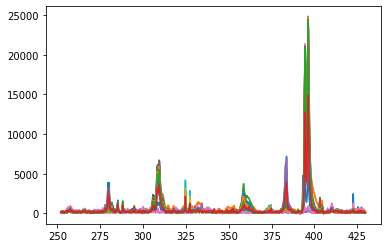

In [5]:
"""#This is just for visualizing the various plots of the samples

df = pd.read_csv('./ref_new/1.csv')
data=df.values
wl= data[0]
print(wl)

for i in range(len(values)):
    plt.plot(wl, values[i])
    #plt.show() #comment this one to have unique plot instead of multiple ones
#range(len(dfs))
#"""



In [6]:
df_y = pd.read_csv('concentration_1.csv', sep = ',')
print(type(df_y))
concentration=df_y.values
print(concentration.shape)
#print(concentration)
values=df_y.values
y_all=pd.DataFrame(values[:,1:-2])
#print(y_all)
df_y

<class 'pandas.core.frame.DataFrame'>
(24, 9)


,Reference Number,Si,Fe,Mg,Cu,Zn,Mn,Al,Total
0,1,0.185,0.228,2.940,0.0304,0.0620,0.280,96.0000,99.7254
1,2,0.360,0.600,1.100,0.0700,0.2000,0.830,96.5787,99.7387
2,3,9.140,1.010,0.200,0.4200,3.6000,0.410,84.7770,99.5570
3,4,8.565,0.000,0.293,0.8870,2.6360,0.330,86.5650,99.2760
4,5,9.500,0.000,0.391,0.0000,0.0580,0.016,90.0210,99.9860
5,6,7.220,0.140,0.360,0.0840,0.1200,0.053,91.8090,99.7860
6,7,7.460,0.530,0.036,0.1400,0.1500,0.100,91.4140,99.8300
7,8,12.900,0.120,0.520,0.1550,0.5200,0.286,84.7905,99.2915
8,9,8.750,0.460,1.710,0.0290,2.0000,0.056,85.3100,98.3150
9,10,0.260,0.420,1.260,0.0200,0.0040,1.160,96.8346,99.9586


In [7]:
y_cu = concentration[:,3]
print(y_cu)
print(y_cu.shape)

[2.94  1.1   0.2   0.293 0.391 0.36  0.036 0.52  1.71  1.26  0.41  0.88
 0.32  0.025 0.77  4.54  0.57  0.39  3.57  0.339 0.363 2.48  1.11  2.03 ]
(24,)


In [8]:
y_df= pd.DataFrame(y_cu)
#df_y_si

In [9]:
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''
    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
    # Get the reference spectrum. If not given, estimate it from the mean    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
    return (data_msc, ref)

In [10]:
Xmsc = msc(x_df.values)
Xmsc[0]

array([[-478.27805339, -462.09209246, -478.58517003, ..., -537.08969828,
        -536.58581228, -505.09543207],
       [-639.20083809, -616.06166649, -679.74393306, ..., -515.69689837,
        -522.49007266, -513.675326  ],
       [-514.34765924, -485.89189488, -584.99033756, ..., -506.38829023,
        -576.36454717, -539.71552413],
       ...,
       [-435.32813568, -436.83812666, -507.52553737, ..., -380.41075029,
        -453.97146559, -447.70042149],
       [-351.32303858, -367.40449428, -345.67768952, ..., -465.86845966,
        -447.62001946, -420.99720676],
       [-450.42425267, -494.13315697, -503.11475057, ..., -523.42870878,
        -603.88206321, -529.78710825]])

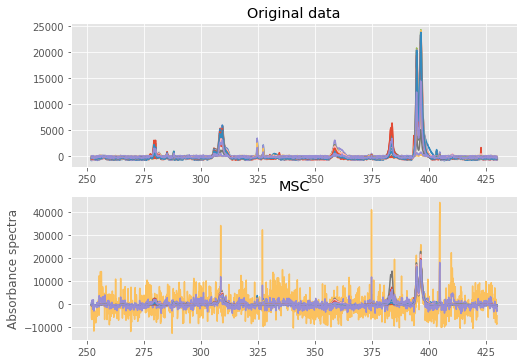

In [15]:
X = x_df.values
wl
Xmsc = msc(X)[0] # Take the first element of the output tuple


## Plot spectra
plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(311)
    plt.plot(wl.T, X.T)
    plt.title('Original data')
    ax2 = plt.subplot(312)
    plt.plot(wl.T, Xmsc.T)
    plt.ylabel('Absorbance spectra')
    plt.title('MSC')
    plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(19, 1446) (19, 1)
(5, 1446) (5, 1)


In [18]:
import pywt

def get_features(data, labels, waveletname):
    list_features = []
    list_unique_labels = list(set(labels))
    list_labels = [list_unique_labels.index(elem) for elem in labels]
    for signal in data:
        list_coeff = pywt.wavedec(signal, waveletname)
        features = []
        for coeff in list_coeff:
            features += get_features(coeff)
        list_features.append(features)
    return list_features, list_labels
 
X_train_1, Y_train_1 = get_features(X_train, y_train, 'db4')
X_test_1, Y_test_1 = get_features(X_test, y_test, 'db4')

ValueError: Axis greater than data dimensions

# Principal Components Analysis

In [64]:
n_components=20

x_df = pd.read_csv('avg_intesities_1.csv', sep = ',')
x = x_df.values
print(x.shape)
print(x[1].shape)
print(len(x))


# This has to be used later for regression, PCA is done on X only
"""
y_df = pd.read_csv('labels_aligned+.csv', sep = ',')
concentration=y_df.values
#print(concentration)
multi_y = concentration[:,2:]
#print (multi_y)
print (multi_y.shape)
multi_y= np.array(multi_y, dtype=np.float)
y=np.around(multi_y, decimals=4)
#print(y)
"""

# PCA

X_std = StandardScaler().fit_transform(x)
#print(X_std)

pca = PCA(n_components= n_components)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
print(principalComponents.shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#print(principalDf)


#print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
#print(pca.singular_values_)

(24, 1446)
(1446,)
24
(24, 20)
[94.28 97.16 98.37 99.41 99.61 99.71 99.79 99.84 99.88 99.91 99.93 99.94
 99.95 99.96 99.97 99.98 99.98 99.98 99.98 99.98]


In [65]:
regr = linear_model.LinearRegression()
# Fit
regr.fit(principalComponents, y_df)
# Calibration
y_c = regr.predict(principalComponents)
# Cross-validation
y_cv = cross_val_predict(regr, principalComponents, y_df, cv=10)
# Calculate scores for calibration and cross-validation
score_c = r2_score(y_df, y_c)
score_cv = r2_score(y_df, y_cv)
# Calculate mean square error for calibration and cross validation
mse_c = mean_squared_error(y_df, y_c)
mse_cv = mean_squared_error(y_df, y_cv)

In [66]:
print(score_c, score_cv)
print(mse_c, mse_cv)

0.9291043223819075 -35.04322417179914
0.09680259952852989 49.21425272235914


In [67]:
n_components=10

x = X_train.values
x_t = X_test.values
print(x.shape)
print(x[1].shape)
print(len(x))


# This has to be used later for regression, PCA is done on X only
"""
y_df = pd.read_csv('labels_aligned+.csv', sep = ',')
concentration=y_df.values
#print(concentration)
multi_y = concentration[:,2:]
#print (multi_y)
print (multi_y.shape)
multi_y= np.array(multi_y, dtype=np.float)
y=np.around(multi_y, decimals=4)
#print(y)
"""

# PCA

X_std = StandardScaler().fit_transform(x)
X_std_test = StandardScaler().fit_transform(x_t)
#print(X_std)

pca = PCA(n_components= n_components)
PC=pca.fit(X_std)

x_pc = pca.fit_transform(X_std)
x_test1 = pca.transform(X_std_test)
print(x_pc.shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#print(principalDf)


#print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

(19, 1446)
(1446,)
19
(19, 10)
[93.79 96.95 98.27 99.4  99.61 99.73 99.81 99.87 99.91 99.94]


In [68]:
x_test1

array([[-17.95412966,   9.69482525,   0.31144891,   3.74695307,
          1.7037103 ,   0.26329461,   0.4447778 ,  -0.90018514,
         -0.50681565,   0.85549515],
       [-41.67945502,   1.7606546 ,   3.6993745 ,  -4.20929179,
          1.46572092,  -0.49409421,   1.37803475,   0.28387187,
          0.62187668,   0.58779621],
       [-20.66645546,   0.0837614 ,  -4.95956203,  -4.0507112 ,
         -1.62273726,  -1.4429495 ,   1.61881077,   1.5878539 ,
          0.35306555,   1.04708397],
       [ 16.08218457,  -6.77711793,   2.51266214,   5.04359265,
         -2.9173948 ,   0.81555906,  -2.99620444,  -0.53543185,
         -0.82051806,  -1.92026325],
       [ 64.21785557,  -4.76212332,  -1.56392353,  -0.53054273,
          1.37070085,   0.85819004,  -0.44541887,  -0.43610878,
          0.35239148,  -0.57011208]])

In [69]:
regr = linear_model.LinearRegression()
# Fit
regr.fit(x_pc, y_train)
# Calibration
y_c = regr.predict(x_test1)
# Cross-validation
#y_cv = cross_val_predict(regr, principalComponents, y_df, cv=10)
# Calculate scores for calibration and cross-validation
score_c = r2_score(y_test, y_c)
#score_cv = r2_score(y_df, y_cv)
# Calculate mean square error for calibration and cross validation
mse_c = mean_squared_error(y_test, y_c)
#mse_cv = mean_squared_error(y_df, y_cv)

print("R2: ", score_c)
print("MSE: ", mse_c)

R2:  -3.044731490825
MSE:  1.612462301619677


#### This is the *mathematical* way to do it

(1508.8695652173917+0j)
[47.43 65.94 74.18 81.21 85.42 88.88 91.66 93.52 94.9  95.92 96.71 97.28
 97.78 98.2  98.59 98.86 99.09 99.3  99.46 99.62]


"# Make a list of (eigenvalue, eigenvector) tuples\neig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]\n\n# Sort the (eigenvalue, eigenvector) tuples from high to low\neig_pairs.sort(key=lambda x: x[0], reverse=True)\n\n# Visually confirm that the list is correctly sorted by decreasing eigenvalues\nprint('Eigenvalues in descending order:')\nfor i in eig_pairs[:20]: #only first 20 eigenvalues\n    print(i[0])\n"

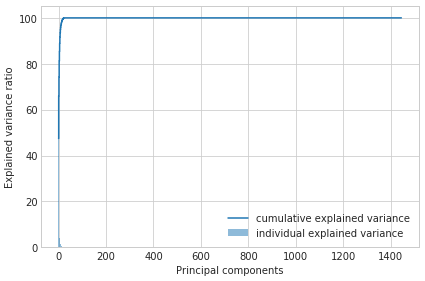

In [24]:
cov_mat = np.cov(X_std.T) #covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print(cum_var_exp.real)
print(np.round(cum_var_exp[:20].real, decimals=2)) # same as above but only first 10 elements

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
'''# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs[:20]: #only first 20 eigenvalues
    print(i[0])
'''

# Linear Regression
this is ordinary least square regression

In [50]:


# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [51]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[ 0.293       0.63016502]
 [ 2.03        0.35868509]
 [ 0.36       -1.23307361]
 [ 0.77        0.90155103]
 [ 1.1         1.52550352]]


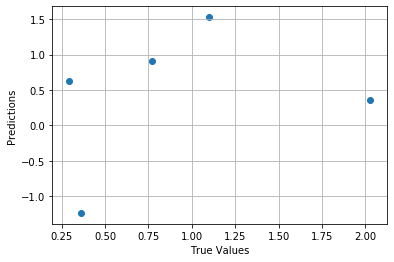

In [52]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

In [53]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  1.0623762254886828
R^2:  -1.8311104503244215


# Partial Least Square Regression

In [10]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    
    return
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
"""   
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    return
""" 

"   \n    # Fit a line to the CV vs response\n    z = np.polyfit(y, y_c, 1)\n    with plt.style.context(('ggplot')):\n        fig, ax = plt.subplots(figsize=(9, 5))\n        ax.scatter(y_c, y, c='red', edgecolors='k')\n        #Plot the best fit line\n        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)\n        #Plot the ideal 1:1 line\n        ax.plot(y, y, color='green', linewidth=1)\n        plt.title('$R^{2}$ (CV): '+str(score_cv))\n        plt.xlabel('Predicted $^{\\circ}$Brix')\n        plt.ylabel('Measured $^{\\circ}$Brix')\n        plt.show()\n    return\n"

## No preprocessing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(19, 1446) (19, 1)
(5, 1446) (5, 1)


100% completed
Suggested number of components:  2



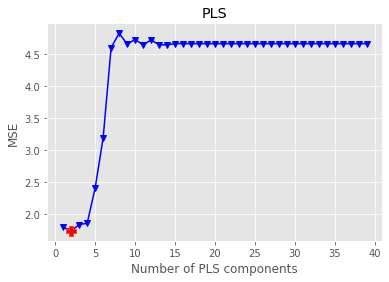

R2 calib: 0.462
R2 CV: -0.274
MSE calib: 0.734
MSE CV: 1.740


In [56]:
optimise_pls_cv(x_df, y_df, 40, plot_components=True)
#optimise_pls_cv(x_df, y_all, 40, plot_components=True)

In [57]:
# Define PLS object
pls = PLSRegression(n_components=2)
# Fit
pls.fit(x_df, y_df)
# Cross-validation
y_cv = cross_val_predict(pls, x_df, y_df, cv=10)
# Calculate scores
score = r2_score(y_df, y_cv)
mse = mean_squared_error(y_df, y_cv)

print("R^2_cv", score)
print("MSE: ", mse)

R^2_cv -0.2742505770214412
MSE:  1.7398912380932783


100% completed
Suggested number of components:  1



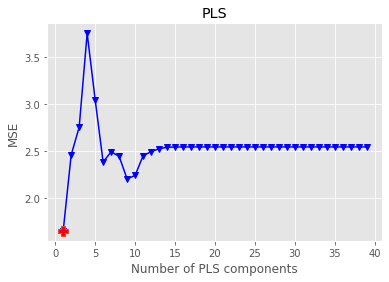

R2 calib: 0.106
R2 CV: -0.028
MSE calib: 1.436
MSE CV: 1.651


In [58]:
optimise_pls_cv(X_train,y_train, 40, plot_components=True)

In [21]:
# Define PLS object
pls = PLSRegression(n_components=20)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  -3.005383526432846
MSE:  5.5050119004518026


In [22]:
y_cv = cross_val_predict(pls, X_test, y_test, cv=5)
# Calculate scores
score = r2_score(y_test, y_cv)
print("R2_cv_test: ", score)

R2_cv_test:  -10.410475268522902


R2_pred:  -2.808555813196904
R2_cv:  -3.005383526432846

TEST
 [real, predictions]
[[1.11       1.49516891]
 [2.48       0.454593  ]
 [2.94       6.9293138 ]
 [0.293      1.93560691]
 [0.32       0.16039575]]

TRAIN
 [real, predictions]
[[0.41  0.41 ]
 [0.036 0.036]
 [0.88  0.88 ]
 [0.2   0.2  ]
 [0.391 0.391]
 [0.339 0.339]
 [0.39  0.39 ]
 [4.54  4.54 ]
 [0.57  0.57 ]
 [2.03  2.03 ]
 [0.025 0.025]
 [0.52  0.52 ]
 [1.26  1.26 ]
 [3.57  3.57 ]
 [0.363 0.363]
 [1.71  1.71 ]
 [1.1   1.1  ]
 [0.36  0.36 ]
 [0.77  0.77 ]]


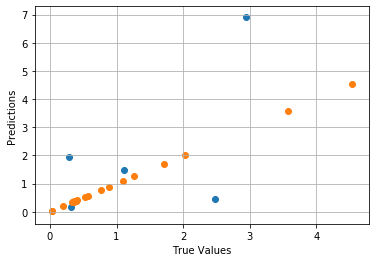

In [23]:
y_pred = pls.predict(X_test)
y_pred1 = pls.predict(X_train)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("TEST\n [real, predictions]")
print(b)
print("")

c=np.append(y_train, y_pred1, axis=1)

print("TRAIN\n [real, predictions]")
print(c)

plt.scatter(y_test, y_pred)
plt.scatter(y_train, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

In [9]:
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X[:,sorted_ind]
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [79]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X2, df_y, 15)

100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  1323
Optimised MSEP  8.806184322820291



In [82]:
opt_Xc.shape

(24, 123)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(opt_Xc, y_df, test_size=0.2, random_state=4)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(19, 123) (19, 1)
(5, 123) (5, 1)


In [84]:
# Define PLS object
pls = PLSRegression(n_components=15)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  -0.6824815608569532
MSE:  2.3124080262688276


R2_pred:  0.45699446341460626
R2_cv:  -0.6824815608569532

TEST
 [real, predictions]
[[1.11       2.29821254]
 [2.48       3.83506375]
 [2.94       2.85675228]
 [0.293      0.38415503]
 [0.32       0.33002927]]

TRAIN
 [real, predictions]
[[0.41       0.40998176]
 [0.036      0.03598829]
 [0.88       0.88003289]
 [0.2        0.19992429]
 [0.391      0.3910417 ]
 [0.339      0.33878926]
 [0.39       0.39012273]
 [4.54       4.54003813]
 [0.57       0.5701305 ]
 [2.03       2.03001101]
 [0.025      0.02503131]
 [0.52       0.52013589]
 [1.26       1.25995226]
 [3.57       3.56997652]
 [0.363      0.3629277 ]
 [1.71       1.70998074]
 [1.1        1.0998942 ]
 [0.36       0.36012675]
 [0.77       0.76991407]]


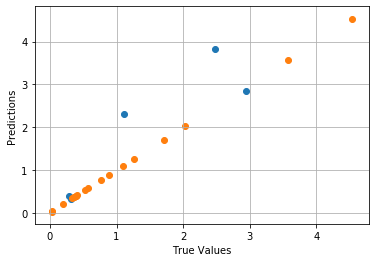

In [85]:
y_pred = pls.predict(X_test)
y_pred1 = pls.predict(X_train)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("TEST\n [real, predictions]")
print(b)
print("")

c=np.append(y_train, y_pred1, axis=1)

print("TRAIN\n [real, predictions]")
print(c)

plt.scatter(y_test, y_pred)
plt.scatter(y_train, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

## Using Savgol filter

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(19, 1446) (19, 1)
(5, 1446) (5, 1)


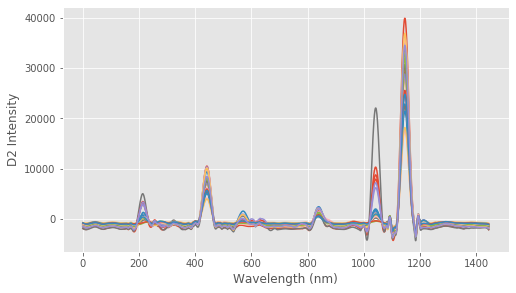

100% completed
Suggested number of components:  5



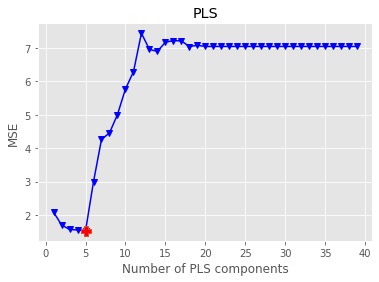

R2 calib: 0.579
R2 CV: -0.116
MSE calib: 0.575
MSE CV: 1.523


In [112]:
# Calculate second derivative
X2 = savgol_filter(x_df, 101, polyorder = 6,deriv=0) # Is this useful with LIBS spectra???
# Plot second derivative
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(range(len(X2.T)), X2.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Intensity')
    plt.show()
    
    
X2_1 = msc(X2)[0]
    
optimise_pls_cv(X2_1, y_df, 40, plot_components=True)

100% completed
Suggested number of components:  6



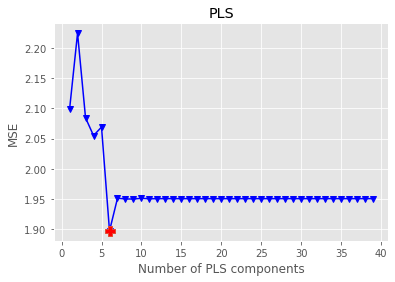

R2 calib: 0.995
R2 CV: -0.380
MSE calib: 0.007
MSE CV: 1.897


In [65]:
X2_train = savgol_filter(X_train, 37, polyorder = 4,deriv=2) 
X2_test = savgol_filter(X_test, 35, polyorder = 4,deriv=2) 




optimise_pls_cv(X2_train, y_train, 40, plot_components=True)

In [54]:
# Define PLS object
pls = PLSRegression(n_components=19)
# Fit
pls.fit(X2_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X2_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R2_cv: ", score)
print("MSE: ", mse)




R2_cv:  -0.4132153315854279
MSE:  1.9423276614929568


R2_pred:  0.24340944615397486
R2_cv:  -0.4132153315854279

[real, predictions]
[[ 1.11        1.6149564 ]
 [ 2.48        1.65092226]
 [ 2.94        1.64802885]
 [ 0.293       1.59828036]
 [ 0.32       -0.16135806]]


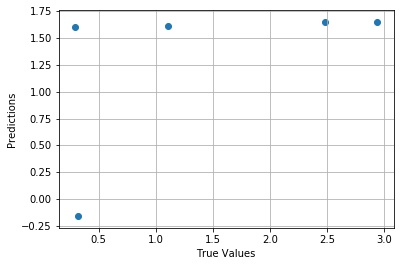

In [55]:
y_pred = pls.predict(X2_test)

# Cross-validation
y_cv = cross_val_predict(pls, X2_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

## Using Normalization

In [76]:
Xn_train = normalize(X2_train, axis=1)
Xn_test = normalize(X2_test, axis=1)

In [ ]:




y_df= pd.DataFrame(y_cu)


100% completed
Suggested number of components:  1



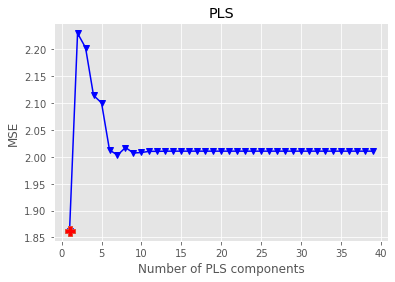

R2 calib: 0.358
R2 CV: -0.355
MSE calib: 0.882
MSE CV: 1.862


In [77]:
optimise_pls_cv(Xn_train,y_train, 40, plot_components=True)

In [56]:
# Define PLS object
pls = PLSRegression(n_components=2)
# Fit
pls.fit(Xn_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, Xn_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  0.4788274282570033
MSE:  0.7721092131853793


R2_pred:  0.31080414382065236
R2_cv:  0.4788274282570033

[real, predictions]
[[0.77       1.44475054]
 [1.11       1.11932368]
 [2.94       1.3018759 ]
 [0.293      0.50866921]
 [0.41       0.40597643]]


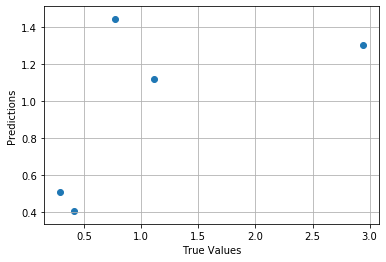

In [51]:
y_pred = pls.predict(Xn_test)

# Cross-validation
y_cv = cross_val_predict(pls, Xn_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [26]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [27]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.92, MSE:0.03, RMSE:0.16
Alpha:0.0010, R2:0.53, MSE:0.12, RMSE:0.35
Alpha:0.0100, R2:0.01, MSE:0.25, RMSE:0.50
Alpha:0.1000, R2:0.00, MSE:0.25, RMSE:0.50
Alpha:0.3000, R2:0.00, MSE:0.25, RMSE:0.50
Alpha:0.5000, R2:0.00, MSE:0.25, RMSE:0.50
Alpha:0.7000, R2:0.00, MSE:0.25, RMSE:0.50
Alpha:1.0000, R2:0.00, MSE:0.25, RMSE:0.50


In [28]:
model = ElasticNet(alpha=0.01).fit(X_train,y_train)   
score = model.score(X_train, y_train)
print("Train score: ", score)
pred_y = model.predict(X_test)


rmse = sqrt(mean_squared_error(y_test, pred_y))
r2 = r2_score(y_test, pred_y)
print("RMSE: ", rmse)
print("R^2: ", r2)

Train score:  0.011397559522610012
RMSE:  0.4999848796658483
R^2:  -0.12347988424433942


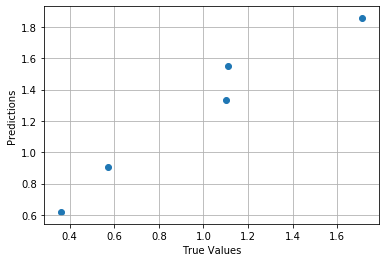

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Random Forest

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_cu, test_size=0.15)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(20, 1130) (20, 1)
(4, 1130) (4, 1)


In [101]:
y_test=np.ravel(y_test)
print(y_test.shape)
y_train=np.ravel(y_train)
print(y_train.shape)

(4,)
(20,)


In [126]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2500, max_depth=30, random_state = 42)
# Train the model on training data
#rf.fit(X_train, y_train);

rf.fit(X_train, y_train);

In [127]:
# Use the forest's predict method on the test data

#predictions = rf.predict(X_test)
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.97


In [128]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  0.38249344953346986
R^2:  0.7354766732612882


In [129]:
y_test= y_test.reshape((len(y_test), 1))
print(y_test.shape)
print(type(y_test))
predictions=predictions.reshape((len(y_test), 1))
print(predictions.shape)
print(type(y_test))
#print((y_test, predictions))

(4, 1)
<class 'numpy.ndarray'>
(4, 1)
<class 'numpy.ndarray'>


In [130]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[2.03      2.7210864]
 [1.71      1.9039496]
 [0.39      0.5556252]
 [0.41      0.616292 ]]


Text(0, 0.5, 'Predictions')

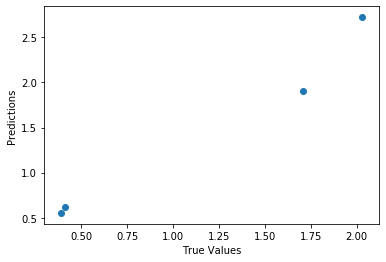

In [131]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [55]:
#I don't remember what's this

#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

In [41]:
c

NameError: name 'c' is not defined

# MultiOutput Random Forest

In [132]:
multi_y = concentration[:,1:-2]
print (multi_y.shape)
print (type(multi_y))
df_y= pd.DataFrame(multi_y)
print (type(df_y))

(24, 6)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [153]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(19, 1130) (19, 6)
(5, 1130) (5, 6)


In [134]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=650,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=650,
                                                

In [135]:
y_multirf = regr_multirf.predict(X_test)

In [136]:
print(y_test.shape)
print(y_multirf.shape)

(5, 6)
(5, 6)


In [137]:
rmse = sqrt(mean_squared_error(y_test, y_multirf))
r2 = r2_score(y_test, y_multirf)

print("R^2: ", r2)
print("RMSE: ", rmse)

R^2:  -1.2798201186343863
RMSE:  1.5231794557929577


In [138]:
b=np.append(np.around(y_test,3), np.around(y_multirf,3), axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[6.160e+00 0.000e+00 3.630e-01 0.000e+00 6.000e-03 2.060e-01 8.711e+00
  2.880e-01 4.460e-01 2.870e-01 7.790e-01 1.910e-01]
 [6.120e+00 0.000e+00 3.200e-01 0.000e+00 5.000e-03 1.600e-02 8.009e+00
  2.150e-01 4.630e-01 8.500e-02 1.110e-01 1.440e-01]
 [1.253e+01 3.100e-01 2.500e-02 5.000e-02 5.600e-02 3.300e-02 7.822e+00
  2.570e-01 2.970e-01 1.650e-01 1.750e-01 2.170e-01]
 [1.800e-01 5.000e-01 1.110e+00 5.200e-02 1.500e-01 1.260e+00 4.830e-01
  3.630e-01 1.233e+00 2.260e-01 1.360e-01 9.710e-01]
 [1.290e+01 1.200e-01 5.200e-01 1.550e-01 5.200e-01 2.860e-01 6.898e+00
  3.360e-01 7.140e-01 1.420e-01 5.610e-01 2.290e-01]]


Text(0, 0.5, 'Predictions')

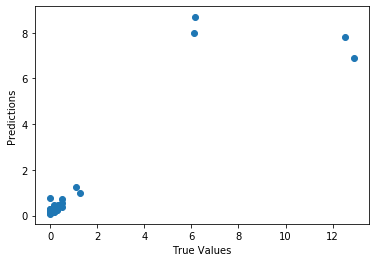

In [139]:
plt.scatter(y_test, y_multirf)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [141]:
y_pred=np.around(y_multirf,2)
y_pred[:,0]

array([8.71, 8.01, 7.82, 0.48, 6.9 ])

In [142]:
y_test[0].values

array([ 6.16,  6.12, 12.53,  0.18, 12.9 ])

In [143]:
print("real: ", y_test[0].values)
print("pred: ", y_pred[:,0])

real:  [ 6.16  6.12 12.53  0.18 12.9 ]
pred:  [8.71 8.01 7.82 0.48 6.9 ]


# PLS-2

100% completed
Suggested number of components:  33



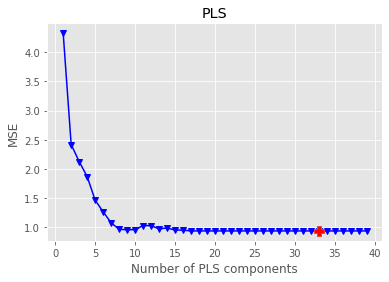

R2 calib: 1.000
R2 CV: 0.018
MSE calib: 0.000
MSE CV: 0.939


In [154]:
optimise_pls_cv(X_train, y_train, 40, plot_components=True)

In [155]:
# Define PLS object
pls = PLSRegression(n_components= 26)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  0.018347253779067135
MSE:  0.9391318844120397


In [150]:
y_pred = pls.predict(X_test)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print(score_pred) #NAMMERDA
print(score_cv)

-4.070272705754876
0.36555579763038115


In [151]:
pd.DataFrame(np.round(y_pred, decimals=2))

,0,1,2,3,4,5
0,7.84,0.22,0.54,0.19,0.57,0.27
1,8.62,0.12,0.35,0.06,-0.12,-0.06
2,10.50,0.13,-0.61,0.45,0.15,-0.03
3,-0.28,0.42,1.56,-0.11,-0.34,0.95
4,9.93,0.09,0.29,-0.26,0.65,0.14


In [152]:
np.round(y_test, decimals=2)

,0,1,2,3,4,5
20,6.16,0.00,0.36,0.00,0.01,0.21
12,6.12,0.00,0.32,0.00,0.01,0.02
13,12.53,0.31,0.02,0.05,0.06,0.03
22,0.18,0.50,1.11,0.05,0.15,1.26
7,12.90,0.12,0.52,0.16,0.52,0.29
